In [1]:
import pandas as pd                       #import all libraries#
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
referrals_df=pd.read_csv('NHS_manual_data_cleaned_reformat.csv')
mood_df=pd.read_csv('popular_tracks_and_moods.csv')
referrals_df.head()


mood_df = mood_df.loc[:, ['date','position','title','mood']]    #drop all columns except date , position and mood
mood_df['positivity']=mood_df['mood']
mood_df['average positivity']=""

mood_df['positivity']=np.where((mood_df['positivity']=='happy') | (mood_df['positivity']== 'calm'),100,0) #convert positive moods to numbers, if not pos parse as 0




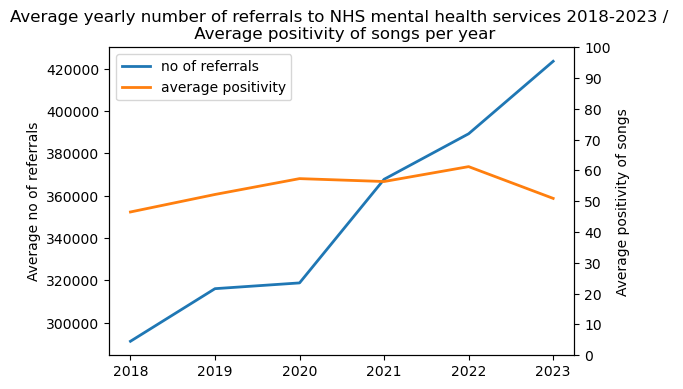

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
                                                
mood_df['year']=mood_df['date'].str[0:4]
mood_df_avg=mood_df.groupby('year')['positivity'].mean()      #make mood df a dataframe#
mood_df_avg = mood_df_avg.to_frame().reset_index()

percentage=[0,10,20,30,40,50,60,70,80,90,100]          #percentage for y axis 2 #

years=mood_df_avg['year']

fig, ax1 = plt.subplots(figsize=(6, 4))

referrals_dfgb=referrals_df.groupby('year')['no_of_referrals'].mean()
lns1=ax1.plot(years, referrals_dfgb,color='tab:blue',label='no of referrals',linewidth=2)

ax2 = ax1.twinx()

lns2=ax2.plot(years,mood_df_avg['positivity'],color='tab:orange',label='average positivity',linewidth=2)
ax2.set_ylim([0,100])

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

plt.yticks(np.arange(0,110, step=10))
plt.title(f'Average yearly number of referrals to NHS mental health services 2018-2023 / \n Average positivity of songs per year')

ax1.set_ylabel('Average no of referrals')
ax2.set_ylabel('Average positivity of songs')
#referrals_avg.plot(x = years,y = avg_referrals, ax=ax)
#referrals_avg.plot(x = years, y = percentage, ax = ax, secondary_y = True) 
plt.show()